In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#import importlib
#import Df2inp
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

#Df2inp = importlib.reload(Df2inp)   # reload it
#prepro_data = Df2inp.prepro_data

#/content/drive/My Drive/Universidad/2020-1/Mineria de datos/Proyectov2/tse_db/train.csv

In [3]:
path = '/content/drive/My Drive/Universidad/2020-1/Mineria de datos'
path = path + '/Proyectov2/tse_db/train.csv'
# path = '/home/jueguevaramo/Documents/Models/Data_bases/'
# path = path + "tweet-sentiment-extraction/train.csv"
data = pd.read_csv(path)

data['text'] = data['text'].astype('str')
data['selected_text'] = data['selected_text'].astype('str')
data["sentiment"] = data["sentiment"].astype("str")

data["text_sent"] = data["text"]   + " " +data["sentiment"]

# data_ = prepro_data(tweet=data.text,
#                     sentiment=data.sentiment,
#                     selected_text=data.selected_text)

#tok = data_.Dt2in(vocab_size=10000,
#                 char_level=True,
#                 max_length=141,
#                 shuffle=True)     
# tok.index_word               
dic_ner_classes = {'0.0':0, 'B-':1, 'I-':2, 'E-':3}

In [4]:
k = 142
print(data["text"].iloc[k])
print(data["selected_text"].iloc[k])


Unfortunatley, AerLingus no longer fly to Copenhagen so we`re have to fly Ryanair to Billund and drive up to Copenhagen one of the days!
Unfortunatley,


In [5]:
print(data["text"].iloc[k].split())
print(data["selected_text"].iloc[k].split())

['Unfortunatley,', 'AerLingus', 'no', 'longer', 'fly', 'to', 'Copenhagen', 'so', 'we`re', 'have', 'to', 'fly', 'Ryanair', 'to', 'Billund', 'and', 'drive', 'up', 'to', 'Copenhagen', 'one', 'of', 'the', 'days!']
['Unfortunatley,']


In [6]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0): return 0.5
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [7]:
c = 15
print("Predicción:", data["text"].iloc[k][:c])
print("Real:", data["selected_text"].iloc[k])
print(jaccard(data["text"].iloc[k][:c], data["selected_text"].iloc[k]))

Predicción: Unfortunatley, 
Real: Unfortunatley,
1.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data["text_sent"],
                                                    data["selected_text"],
                                                    test_size=0.2,
                                                    shuffle=True)

In [9]:
X_train.iloc[k], y_train.iloc[k]

(' Ooh, jealous. I just have yoghurt and some carrots. negative', 'jealous.')

In [10]:
filter1_p = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
filter2_p = '"#$%&()+,-/:;<=>@[\\]^_`{|}~\t\n'
filter3 = '~\t\n'
tokenizer1 = Tokenizer(num_words=25000,
                       filters=filter3,
                       oov_token="<OOD>",
                       lower=True)

tokenizer1.fit_on_texts(X_train)
seq1 = tokenizer1.texts_to_sequences(X_train)
subseq1 = tokenizer1.texts_to_sequences(y_train)


seq2 = tokenizer1.texts_to_sequences(X_test)
subseq2 = tokenizer1.texts_to_sequences(y_test)

def find_sub_list(sl, l):
    sll = len(sl)
    for ind in (i for i, e in enumerate(l) if e == sl[0]):
        if l[ind:ind+sll] == sl:
            return (ind, ind+sll-1)
    return('')



In [11]:
qq = 82
print(seq1[qq])
print(subseq1[qq])

[870, 23, 19, 1704, 53, 69, 2, 1330, 2, 54, 183, 561, 305, 21, 69, 2, 62, 1972, 8, 445, 11541, 53, 12, 47, 7154, 5345, 5346, 7]
[5345, 5346]


In [12]:
find_sub_list(subseq1[qq], seq1[qq])

(25, 26)

In [13]:
##  Intentar con reversa
mask = np.zeros((len(seq1), 36))
indx_id = np.zeros((len(seq1), 36))
token_class = np.zeros((len(seq1), 36))
begin_token = np.zeros((len(seq1), 36))
end_token = np.zeros((len(seq1), 36))

count = 0

for kk in range(len(seq1)):
    
    str1 = subseq1[kk]
    str2 = seq1[kk]
    bool_ = np.isin(str1, str2)
    
    indices = "NA"
    
    indx_id[kk,:len(str2)] = str2

    for ii in range(len(str1)):
        a = find_sub_list(str1[ii:], str2)
        if a != "":
            indices = a 
            break
    
    if indices == "NA":
        count = count + 1
    
    else:
        mask[kk,indices[0] : indices[1] + 1 ] = 1

        if sum(mask[kk]) == 1:
            
            token_class[kk, indices[0]] = 1 
            
            begin_token[kk, indices[0]] = 1
            end_token[kk, indices[0]] = 1
        
        elif sum(mask[kk]) == 2:
            
            token_class[kk, indices[0]] = 1
            token_class[kk, indices[1]] = 3 

            begin_token[kk, indices[0]] = 1
            end_token[kk, indices[1]] = 1
        
        elif sum(mask[kk]) > 2:
            token_class[kk, indices[0]] = 1
            token_class[kk, indices[1]] = 3 
            token_class[kk, indices[0]+1:indices[1]] = 2

            begin_token[kk, indices[0]] = 1
            end_token[kk, indices[1]] = 1


mask_t = np.zeros((len(seq2), 36))
indx_id_t = np.zeros((len(seq2), 36))
token_class_t = np.zeros((len(seq2), 36))
begin_token_t = np.zeros((len(seq2), 36))
end_token_t = np.zeros((len(seq2), 36))

count = 0

for kk in range(len(seq2)):
    
    str1 = subseq2[kk]
    str2 = seq2[kk]
    bool_ = np.isin(str1, str2)
    
    indices = "NA"
    
    indx_id_t[kk,:len(str2)] = str2

    for ii in range(len(str1)):
        a = find_sub_list(str1[ii:], str2)
        if a != "":
            indices = a 
            break
    
    if indices == "NA":
        count = count + 1
    
    else:
        mask_t[kk,indices[0] : indices[1] + 1 ] = 1

        if sum(mask_t[kk]) == 1:
            
            token_class_t[kk, indices[0]] = 1 
            
            begin_token_t[kk, indices[0]] = 1
            end_token_t[kk, indices[0]] = 1
        
        elif sum(mask_t[kk]) == 2:
            
            token_class_t[kk, indices[0]] = 1
            token_class_t[kk, indices[1]] = 3 

            begin_token_t[kk, indices[0]] = 1
            end_token_t[kk, indices[1]] = 1
        
        elif sum(mask_t[kk]) > 2:
            token_class_t[kk, indices[0]] = 1
            token_class_t[kk, indices[1]] = 3 
            token_class_t[kk, indices[0]+1:indices[1]] = 2

            begin_token_t[kk, indices[0]] = 1
            end_token_t[kk, indices[1]] = 1


In [14]:
kk = 30
mask[kk]
str1 = subseq1[kk]
str2 = seq1[kk]
print(str2)
print(str1)
print(mask[kk])
print(token_class[kk])
print(begin_token[kk])
print(end_token[kk])

[7133, 7]
[7133]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.losses import sparse_categorical_crossentropy
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam

In [37]:
model = tf.keras.Sequential([
    layers.Embedding(tokenizer1.num_words + 1, 16,
                    input_length=36,
                     mask_zero = True),
    layers.Bidirectional(
        layers.LSTM(10,recurrent_dropout=0.2,return_sequences=True),
    ),
        layers.Bidirectional(
        layers.LSTM(10,recurrent_dropout=0.2,return_sequences=True),
    ),
    layers.Dense(10, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001)
            , loss="sparse_categorical_crossentropy",
              metrics=["acc"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 36, 16)            400016    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 36, 20)            2160      
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 36, 20)            2480      
_________________________________________________________________
dense_10 (Dense)             (None, 36, 10)            210       
_________________________________________________________________
dense_11 (Dense)             (None, 36, 4)             44        
Total params: 404,910
Trainable params: 404,910
Non-trainable params: 0
_________________________________________________________________


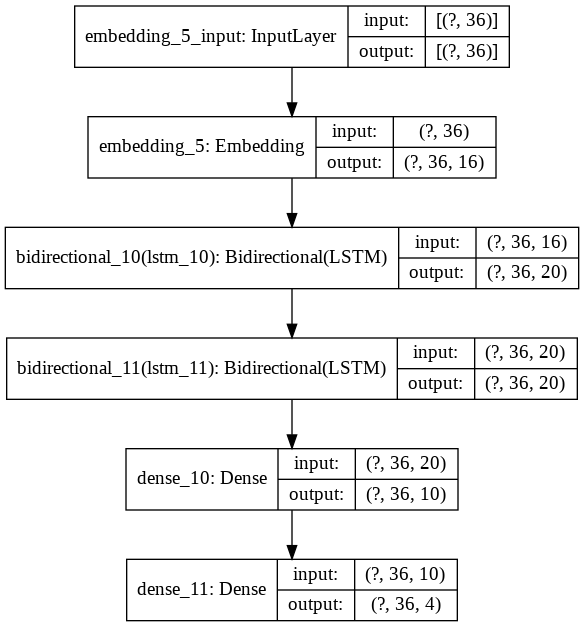

In [38]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [39]:
X = tf.convert_to_tensor(indx_id)

y =  tf.convert_to_tensor(token_class.reshape(len(token_class), 36, 1))
# y = tf.convert_to_tensor(token_class.reshape(len(token_class), 36, 1))
# map_clas = {"positive":0, "negative":1, "neutral":2}
# sent_key = list(map(map_clas.get, sentiment_train))
# sentiment = tf.convert_to_tensor(tf.keras.utils.to_categorical(sent_key, num_classes=3, dtype='float32'))


In [40]:
history = model.fit(X, y, batch_size=32, epochs=40,
                     validation_split=0.1, verbose=1)

Epoch 1/40
619/619 [==============================] - 78s 125ms/step - loss: 0.4359 - acc: 0.8132 - val_loss: 0.3908 - val_acc: 0.8076
Epoch 2/40
619/619 [==============================] - 76s 123ms/step - loss: 0.3810 - acc: 0.8141 - val_loss: 0.3766 - val_acc: 0.8076
Epoch 3/40
619/619 [==============================] - 76s 123ms/step - loss: 0.3306 - acc: 0.8725 - val_loss: 0.2830 - val_acc: 0.9174
Epoch 4/40
619/619 [==============================] - 75s 122ms/step - loss: 0.2698 - acc: 0.9161 - val_loss: 0.2575 - val_acc: 0.9175
Epoch 5/40
619/619 [==============================] - 76s 122ms/step - loss: 0.2533 - acc: 0.9163 - val_loss: 0.2459 - val_acc: 0.9179
Epoch 6/40
619/619 [==============================] - 75s 121ms/step - loss: 0.2407 - acc: 0.9169 - val_loss: 0.2375 - val_acc: 0.9179
Epoch 7/40
619/619 [==============================] - 75s 122ms/step - loss: 0.2287 - acc: 0.9178 - val_loss: 0.2315 - val_acc: 0.9180
Epoch 8/40
619/619 [==============================] - 7

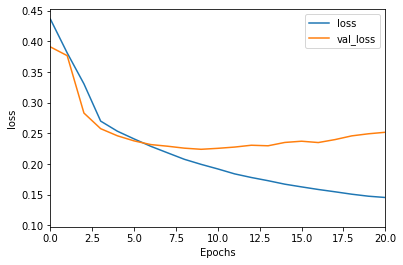

In [43]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.xlim(0,20)
  plt.show()
  
# plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

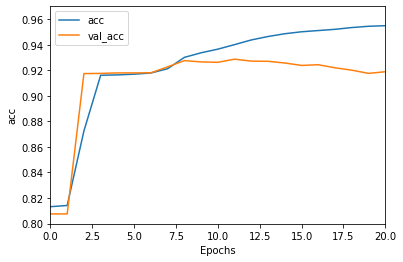

In [44]:
plot_graphs(history, "acc")

In [45]:
X_t = tf.convert_to_tensor(indx_id_t)
y_t =  tf.convert_to_tensor(token_class_t.reshape(len(token_class_t), 36, 1))
results = model.evaluate(X_t, y_t, batch_size=128)

43/43 [==============================] - 1s 21ms/step - loss: 0.3376 - acc: 0.9037


In [48]:
predictions = model.predict(X_t)

In [54]:
kkk = 1447
print(tokenizer1.sequences_to_texts([np.int32(X_t[kkk])])[0:5])
print(token_class_t[kkk][0:5])
print(predictions[kkk].argmax(axis = 0))

['<OOD> ow, caught a <OOD> maybe i should take a nap neutral <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD>']
[1. 2. 2. 2. 2.]
[11 12  9 10]


In [53]:
print(tokenizer1.sequences_to_texts([np.int32(X_t[kkk])])[0:5])

['headed back to <OOD> neutral <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD> <OOD>']


In [ ]:
print(predictions[4].argmax(axis = 0))
print(np.round(predictions[4], 2).argmax(axis = 0))

[6 7 4 5]
[6 7 4 5]


In [ ]:
print(np.round(predictions[kkk], 2))

[[0.   0.83 0.12 0.  ]
 [0.   0.   0.95 0.  ]
 [0.   0.   0.96 0.  ]
 [0.   0.   0.96 0.  ]
 [0.   0.   0.96 0.  ]
 [0.   0.   0.95 0.  ]
 [0.   0.   0.93 0.  ]
 [0.   0.   0.   0.9 ]
 [0.99 0.   0.   0.  ]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]
 [0.4  0.33 0.11 0.16]]


In [ ]:
/predictions.argmax(axis = 2).shape

(5497, 36)

In [ ]:
predictions = model.predict(X_t).argmax(axis = 2)

In [ ]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0): return 0.5
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [ ]:
k = np.random.randint(indx_id_t.shape[0]) 
print("texto real:")
print(X_test.iloc[k].lower().split())
print("texto real seleccionado:")
print(y_test.iloc[k].lower().split())
print("index_")
print(indx_id_t[k].astype(int))
print("predicciones:")
print(predictions[k])

a=np.argmax(predictions[k]!=0,)
b=np.argmax(predictions[k][::-1]!=0,)



if a == 0 and b == 0:
    print("nada")
elif a == b:
    index = indx_id_t[k]
    prediciton_text = tokenizer1.sequences_to_texts([index])
    print(tokenizer1.sequences_to_texts([index]))
else:
    index = indx_id_t[k][a:len(predictions[k])-b]
    prediciton_text = tokenizer1.sequences_to_texts([index])
    print(tokenizer1.sequences_to_texts([index]))

prediciton_text = prediciton_text[0].replace("<OOD>","")
print("=="*30)
print("Prediction:", prediciton_text.split())
print("Real:",  y_test.iloc[k].lower().split())
print("Jaccard Score:", jaccard(prediciton_text, y_test.iloc[k]))

texto real:
['yikeysss!!', 'i`m', 'harmless', 'really!!', 'just', 'want', 'some', 'attention', 'from', 'brody!!!', 'positive']
texto real seleccionado:
['m', 'harmless']
index_
[    1    24 20885     1    23    76    70  1863    49     1     6     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0]
predicciones:
[1 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['<OOD> i`m harmless']
Prediction: ['i`m', 'harmless']
Real: ['m', 'harmless']
Jaccard Score: 0.3333333333333333


In [ ]:
jac = []
for k in range(indx_id_t.shape[0]):
    a=np.argmax(predictions[k]!=0,)
    b=np.argmax(predictions[k][::-1]!=0,)


    if a == 0 and b == 0:
        prediciton_text = " "
    elif a == b:
        index = indx_id_t[k]
        prediciton_text = tokenizer1.sequences_to_texts([index])

    else:
        index = indx_id_t[k][a:len(predictions[k])-b]
        prediciton_text = tokenizer1.sequences_to_texts([index])
    
    jac.append(jaccard(prediciton_text[0],y_test.iloc[k]))

In [ ]:
np.array(jac).mean()

0.49344637714381206